In [1]:
# use case= to recommend an anime related to one's interest from the anime.csv dataset.
import pandas as pd
df=pd.read_csv(r"/content/anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [2]:
df.shape                             # EDA 1 to process the dataset

(12294, 7)

In [3]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [4]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [5]:
df['genre'] = df['genre'].fillna('')                     #filling null values accordingly
df['type'] = df['type'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [6]:
df=df.drop('anime_id', axis=1)               #dropping anime_id because it does not have much difference and any inference in the outout

In [7]:
df

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,Under World,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [8]:
df.nunique()

,0
name,12292
genre,3265
type,7
episodes,187
rating,599
members,6706


In [9]:
df.describe()

,rating,members
count,12294.000000,1.229400e+04
mean,6.352786,1.807134e+04
std,1.343119,5.482068e+04
min,0.000000,5.000000e+00
25%,5.820000,2.250000e+02
50%,6.550000,1.550000e+03
75%,7.170000,9.437000e+03
max,10.000000,1.013917e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12294 non-null  object 
 2   type      12294 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12294 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 576.4+ KB


In [11]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', 0], dtype=object)

In [12]:
type_map={                                              # mapping the typo of the show to numerics
    'TV':1,
    'Movie':2,
    'OVA':3,
    'Special':4,
    'Music':5,
    'ONA':6,
}
df['type']=df['type'].map(type_map)
df

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",2.0,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",1.0,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",1.0,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",1.0,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",1.0,51,9.16,151266
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,3.0,1,4.15,211
12290,Under World,Hentai,3.0,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,3.0,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3.0,1,4.98,175


In [13]:
z=df.corr(numeric_only=True)
z

,type,rating,members
type,1.000000,-0.179126,-0.239986
rating,-0.179126,1.000000,0.311421
members,-0.239986,0.311421,1.000000


<Axes: >

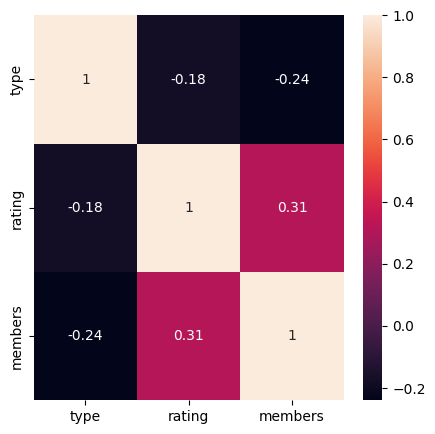

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(z,annot=True)                                  # visualization of the correlation of the numerical columns of the dataset

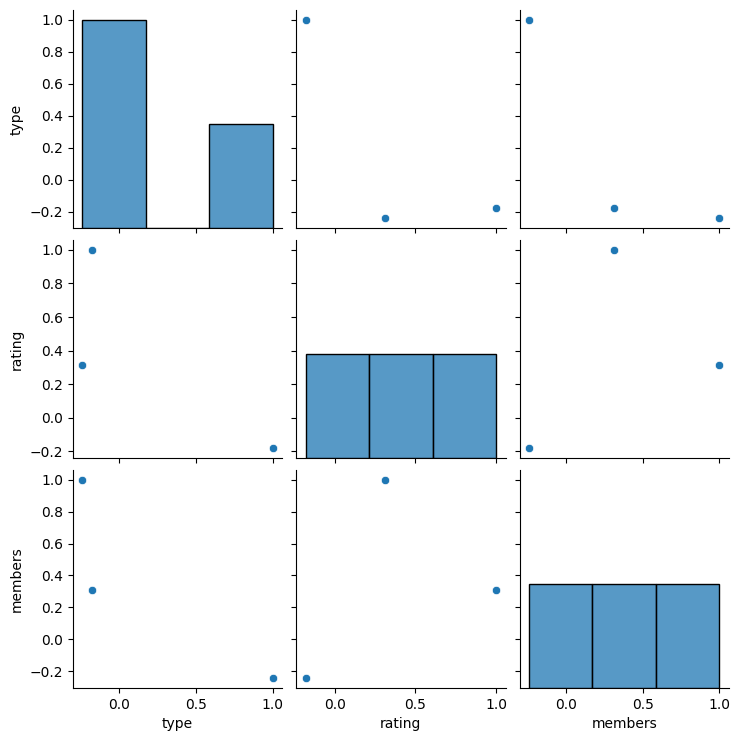

In [15]:
sns.pairplot(z)

In [16]:
x=df

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer                  # to convert the categorical columns to numerical columns
from sklearn.metrics.pairwise import cosine_similarity                       # to predict the similarity score in the prediction

In [18]:
df.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",2.0,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",1.0,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",1.0,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",1.0,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",1.0,51,9.16,151266


In [19]:
vector= TfidfVectorizer()

In [20]:
tfidf_matrix = vector.fit_transform(df['genre'])                 #fitting the model

In [21]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41638 stored elements and shape (12294, 47)>
  Coords	Values
  (0, 8)	0.44024715174602147
  (0, 31)	0.4903869890743284
  (0, 33)	0.5189547975465538
  (0, 42)	0.5444161684130491
  (1, 8)	0.33583365500987794
  (1, 0)	0.29464923376142327
  (1, 1)	0.3176066463834324
  (1, 10)	0.3196092910272099
  (1, 20)	0.44963166999178716
  (1, 23)	0.5215484702178532
  (1, 37)	0.35098726333369934
  (2, 0)	0.2506314436398565
  (2, 37)	0.29855310799740736
  (2, 5)	0.20076598368966767
  (2, 15)	0.37886802211807874
  (2, 27)	0.4480162264049301
  (2, 32)	0.5507572919931326
  (2, 34)	0.28297511283487664
  (2, 11)	0.28297511283487664
  (3, 34)	0.3904035047060254
  (3, 11)	0.3904035047060254
  (3, 43)	0.8337686771680168
  (4, 0)	0.2506314436398565
  (4, 37)	0.29855310799740736
  (4, 5)	0.20076598368966767
  :	:
  (12275, 14)	1.0
  (12276, 14)	1.0
  (12277, 5)	0.5045601097468614
  (12277, 14)	0.8633765665410634
  (12278, 38)	0.4974674543287695
  (12278

In [22]:
cos_sim = cosine_similarity(tfidf_matrix)       #fitting the dataset
cos_sim

array([[1.        , 0.14784981, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1786367 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [23]:
similarities = cos_sim[5]           #selecting an anime based on index to find aby other anime similar to it

In [24]:
similarities

array([0.42499255, 0.28386876, 0.1830588 , ..., 0.        , 0.        ,
       0.        ])

In [25]:
similar_movies = list(enumerate(similarities))
similar_movies

[(0, np.float64(0.4249925473523769)),
 (1, np.float64(0.2838687576562585)),
 (2, np.float64(0.1830588029042322)),
 (3, np.float64(0.0)),
 (4, np.float64(0.1830588029042322)),
 (5, np.float64(1.0000000000000002)),
 (6, np.float64(0.16234038117025562)),
 (7, np.float64(0.1436350199656527)),
 (8, np.float64(0.1830588029042322)),
 (9, np.float64(0.1830588029042322)),
 (10, np.float64(0.1358447582970987)),
 (11, np.float64(0.7538338026162883)),
 (12, np.float64(0.1830588029042322)),
 (13, np.float64(0.11477581982457459)),
 (14, np.float64(1.0000000000000002)),
 (15, np.float64(0.21833884869793507)),
 (16, np.float64(0.5551110777086256)),
 (17, np.float64(0.0)),
 (18, np.float64(0.0)),
 (19, np.float64(0.15703421599412704)),
 (20, np.float64(0.8793269017589317)),
 (21, np.float64(0.10640855365668074)),
 (22, np.float64(0.21810732503662367)),
 (23, np.float64(0.0533483190147079)),
 (24, np.float64(0.0)),
 (25, np.float64(0.2555601404065054)),
 (26, np.float64(0.06389176071058092)),
 (27, np.f

In [26]:
sorted_x = sorted(similar_movies, key=lambda x: x[1], reverse=True)

In [33]:
print("Recommendations for someone who liked 'Haikyu':")                       # calculating the cosine similarity among the dataset for the selected anime
for idx, score in sorted_x[1:50]:
    print(f"{x['name'][idx]} (Similarity Score: {score:.2f})")

Recommendations for someone who liked 'Haikyu':
Haikyuu!! Second Season (Similarity Score: 1.00)
Haikyuu!! (Similarity Score: 1.00)
Slam Dunk (Similarity Score: 1.00)
Haikyuu!! Movie 1: Owari to Hajimari (Similarity Score: 1.00)
Haikyuu!! Movie 2: Shousha to Haisha (Similarity Score: 1.00)
Rokudenashi Blues (Similarity Score: 1.00)
Batsu &amp; Terry (Similarity Score: 1.00)
Rokudenashi Blues 1993 (Similarity Score: 0.94)
Kuroko no Basket 3rd Season (Similarity Score: 0.91)
Kuroko no Basket 2nd Season (Similarity Score: 0.91)
Diamond no Ace: Second Season (Similarity Score: 0.91)
Kuroko no Basket (Similarity Score: 0.91)
Diamond no Ace (Similarity Score: 0.91)
Prince of Tennis: The National Tournament Finals (Similarity Score: 0.91)
Kuroko no Basket: Tip Off (Similarity Score: 0.91)
Kuroko no Basket: Mou Ikkai Yarimasen ka (Similarity Score: 0.91)
Kuroko no Basket NG-shuu (Similarity Score: 0.91)
Prince of Tennis: Another Story - Messages From Past and Future (Similarity Score: 0.91)
Ku

In [28]:
#since it is an unsupervised method of classification, classification report cannot be calculated for this method. Cosine similarity itself is an metric system used to calculate
#similarity among the prediction.

# if similarity score=1 -> perfect predcition, exact match
# if similarity score=0 -> No similarity (orthogonal)
# if simlarity score=-1 ->Opposite direction (not usually relevant in positive data spaces like recommender systems)

In [29]:
#1.User-based collaborative filtering finds similar users and recommends items they liked, while item-based filtering recommends items
#similar to those the user already liked.

#2.Collaborative filtering recommends items by analyzing user preferences and finding patterns in behavior, either between users or between
#items, without needing item content.